In [97]:
from collections import defaultdict
from functools import reduce

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_federated as tff
from tqdm import tqdm

In [2]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

97402880/97398400 [==============================] - 5s 0us/step


C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [16]:
client_datasets = {client_id: emnist_train.create_tf_dataset_for_client(client_id) for client_id in emnist_train.client_ids}

In [17]:
class_labels = {}
for client_id, ds in client_datasets.items():
    class_labels[client_id] = [item['label'].numpy() for item in ds]

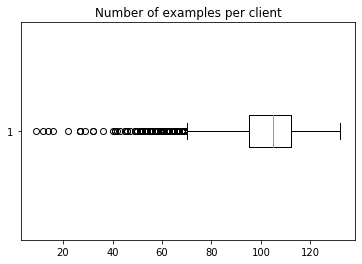

In [24]:
plt.title('Number of examples per client')
plt.boxplot([len(cl) for _, cl in class_labels.items()], vert=False)
plt.show()

In [84]:
sum([len(cl) for _, cl in class_labels.items()])

341873

130289it [01:30, 1679.03it/s]

In [35]:
def count_list(l):
    counts = [0]*10
    for v in l:
        counts[v] += 1
    return counts

In [38]:
[count_list(cl) for _, cl in class_labels.items()]

[[11, 11, 11, 11, 7, 7, 9, 11, 7, 8],
 [12, 10, 11, 11, 12, 10, 11, 11, 10, 11],
 [5, 12, 5, 7, 8, 6, 6, 9, 6, 9],
 [7, 13, 10, 10, 12, 7, 10, 11, 11, 9],
 [12, 12, 10, 12, 10, 7, 12, 11, 10, 9],
 [10, 10, 10, 13, 8, 13, 10, 12, 8, 9],
 [12, 12, 8, 11, 10, 10, 11, 10, 12, 11],
 [8, 12, 5, 6, 11, 9, 9, 8, 10, 7],
 [12, 13, 12, 12, 9, 9, 11, 10, 12, 9],
 [6, 12, 6, 7, 11, 6, 8, 13, 11, 8],
 [13, 12, 13, 9, 11, 9, 12, 10, 7, 10],
 [10, 9, 10, 12, 8, 10, 12, 9, 8, 8],
 [10, 12, 12, 13, 6, 8, 9, 9, 11, 11],
 [11, 11, 10, 9, 11, 7, 9, 9, 8, 10],
 [11, 9, 6, 4, 8, 5, 10, 10, 6, 6],
 [12, 7, 12, 8, 10, 9, 9, 9, 7, 10],
 [12, 15, 11, 11, 10, 10, 6, 11, 12, 8],
 [11, 10, 8, 10, 9, 6, 10, 10, 8, 10],
 [12, 13, 13, 12, 11, 10, 11, 11, 12, 10],
 [11, 8, 6, 7, 8, 5, 8, 7, 7, 5],
 [11, 9, 6, 8, 7, 6, 7, 11, 12, 10],
 [10, 11, 10, 12, 12, 8, 8, 12, 11, 12],
 [10, 10, 11, 10, 12, 8, 9, 10, 9, 7],
 [10, 10, 9, 9, 6, 6, 5, 9, 4, 6],
 [11, 12, 11, 9, 9, 10, 10, 10, 10, 11],
 [8, 8, 4, 0, 4, 4, 6, 12, 4, 4

In [39]:
from keras.datasets import mnist

Using TensorFlow backend.


In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [44]:
emnist_train, _ = tff.simulation.datasets.emnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [146]:
emnist_train_all = {client_id: emnist_train.create_tf_dataset_for_client(client_id) for client_id in emnist_train.client_ids[:700]}

In [147]:
xs = []
ys = []
contents = []
for client_id, ds in tqdm(emnist_train_all.items()):
    xs.append(np.stack([item['pixels'] for item in ds.as_numpy_iterator()]))
    ys.append(np.array([item['label'] for item in ds.as_numpy_iterator()]))
    contents.append(client_id)





  0%|                                                                                          | 0/700 [00:00<?, ?it/s]



  0%|                                                                                  | 1/700 [00:00<02:27,  4.74it/s]



  1%|▌                                                                                 | 5/700 [00:00<01:48,  6.38it/s]



  1%|█                                                                                 | 9/700 [00:00<01:22,  8.42it/s]



  2%|█▌                                                                               | 13/700 [00:00<01:02, 10.91it/s]



  2%|█▉                                                                               | 17/700 [00:00<00:49, 13.86it/s]



  3%|██▍                                                                              | 21/700 [00:00<00:39, 17.00it/s]



  4%|██▉                                                                              | 25/700 [00:00<00:33, 20.17it/s]



  4%|███▍   

 34%|███████████████████████████▏                                                    | 238/700 [00:07<00:15, 29.92it/s]



 35%|███████████████████████████▋                                                    | 242/700 [00:07<00:15, 30.04it/s]



 35%|████████████████████████████                                                    | 246/700 [00:07<00:14, 31.92it/s]



 36%|████████████████████████████▌                                                   | 250/700 [00:07<00:13, 33.47it/s]



 36%|█████████████████████████████▏                                                  | 255/700 [00:07<00:12, 36.02it/s]



 37%|█████████████████████████████▌                                                  | 259/700 [00:07<00:12, 35.92it/s]



 38%|██████████████████████████████                                                  | 263/700 [00:08<00:12, 34.92it/s]



 38%|██████████████████████████████▌                                                 | 267/700 [00:08<00:12, 34.63it/s]



 39%|███████████

 69%|███████████████████████████████████████████████████████▏                        | 483/700 [00:14<00:06, 33.14it/s]



 70%|███████████████████████████████████████████████████████▋                        | 487/700 [00:14<00:06, 33.30it/s]



 70%|████████████████████████████████████████████████████████                        | 491/700 [00:14<00:06, 33.71it/s]



 71%|████████████████████████████████████████████████████████▌                       | 495/700 [00:14<00:05, 34.55it/s]



 71%|█████████████████████████████████████████████████████████                       | 499/700 [00:14<00:05, 34.14it/s]



 72%|█████████████████████████████████████████████████████████▍                      | 503/700 [00:15<00:05, 33.13it/s]



 72%|█████████████████████████████████████████████████████████▉                      | 507/700 [00:15<00:06, 32.00it/s]



 73%|██████████████████████████████████████████████████████████▍                     | 511/700 [00:15<00:05, 32.70it/s]



 74%|███████████

In [148]:
unique_content_ids = list(set(emnist_train_all.keys()))

In [150]:
len(unique_content_ids)

700

In [133]:
xs_np = np.concatenate(xs, axis=0)
ys_np = np.concatenate(ys, axis=0)

In [151]:
[unique_content_ids.index(c) for c in contents]

[264,
 83,
 274,
 495,
 81,
 561,
 24,
 216,
 102,
 434,
 161,
 86,
 501,
 529,
 446,
 403,
 332,
 174,
 199,
 619,
 299,
 321,
 137,
 294,
 251,
 68,
 359,
 170,
 538,
 390,
 244,
 575,
 450,
 15,
 515,
 194,
 230,
 190,
 542,
 429,
 276,
 642,
 98,
 309,
 656,
 295,
 302,
 546,
 3,
 373,
 182,
 326,
 374,
 657,
 477,
 472,
 522,
 160,
 468,
 637,
 147,
 499,
 486,
 245,
 464,
 645,
 115,
 279,
 632,
 607,
 176,
 583,
 421,
 277,
 665,
 590,
 76,
 305,
 100,
 569,
 114,
 634,
 635,
 535,
 38,
 591,
 293,
 682,
 94,
 344,
 365,
 551,
 352,
 463,
 333,
 4,
 275,
 532,
 126,
 636,
 382,
 303,
 151,
 300,
 448,
 89,
 263,
 563,
 385,
 21,
 358,
 262,
 153,
 519,
 206,
 205,
 438,
 255,
 674,
 598,
 142,
 140,
 5,
 148,
 30,
 87,
 630,
 317,
 193,
 337,
 476,
 146,
 246,
 118,
 562,
 564,
 372,
 41,
 296,
 46,
 342,
 596,
 219,
 605,
 639,
 200,
 603,
 210,
 351,
 322,
 191,
 267,
 456,
 640,
 18,
 184,
 339,
 681,
 693,
 17,
 391,
 54,
 99,
 122,
 369,
 392,
 651,
 261,
 663,
 414,
 133,


In [130]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [131]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))